# Actividad KNN

## Parte 1

Ejecutar el código en main.py, como python main.py desde una terminal
- Puede modificar main.py, pero no es necesario.

Crear 3 funciones en src/knn.py:
- Distancia_euclidiana
- Distancia_manhattan
- Similitud coseno

Terminar la función de la clase KNNRegressor


In [49]:
import numpy as np
from scipy import stats


def make_data(n_features, n_pts, noise=0.0):

    X = stats.uniform(-1, 2).rvs((n_pts, n_features))

    # include a feature of 1's, for first-order terms in quadratic
    ones = np.ones((n_pts, 1))
    X_plus_ones = np.concatenate([ones, X], axis=1)

    # random coefficient matrix
    coeffs = stats.uniform(-1, 2).rvs((n_features+1, n_features+1))

    y = (X_plus_ones.reshape(n_pts, n_features+1, 1) *
         coeffs *
         X_plus_ones.reshape(n_pts, 1, n_features+1)).sum(axis=(1, 2))
    y += stats.norm(0, noise).rvs(n_pts)
    return X, y


In [50]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split


def euclidean_distance(a, b):
    return np.linalg.norm(a-b)

def cosine_distance(a, b):
    return (a@b)/(np.linalg.norm(a)*np.linalg.norm(b)) #El @ hace el producto punto

def manhattan_distance(a, b):
    return sum(abs(val1-val2) for val1, val2 in zip(a,b)) #Los colocas en pares

class KNNRegressor:
    def __init__(self, k=5, distance=euclidean_distance):
        self.k = k
        self.distance = distance

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
                                                
    def predict(self, X):
        self.X_test = X
        values_x = []
        positions = []
        results = []
        for i in self.X_test:
            for position, j in enumerate(self.X_train):
                values_x.append(self.distance(i,j))
                positions.append(position)
            df = pd.DataFrame.from_dict({'Positions': positions, 'x_value': values_x})
            df = df.sort_values(by = 'x_value')
            df = df.iloc[:self.k,:]
            df['y_values'] = self.y_train[df['Positions']]
            mean = df['y_values'].mean()
            results.append(mean)
        return np.array(results) #Array donde imputas los valores que se predicen

In [51]:
# get data
X, y = make_data(n_features=2, n_pts=300, noise=0.1)

# separate into training and test
X_train = X[5:]
y_train = y[5:]
X_test = X[:5]
y_test = y[:5]

# perform a KNN Regression using multiple distance functions
for f in [euclidean_distance, manhattan_distance, cosine_distance]:
    knn = KNNRegressor(k=3, distance=f)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    print(f.__name__)
    print("Compare our predictions to the actual values. Are they similar?")
    print("Predictions", y_pred)
    print("Actual", y_test)
    print('*' * 50)

euclidean_distance
Compare our predictions to the actual values. Are they similar?
Predictions [-0.11047219 -0.07846695  0.06245748  0.06245748 -0.08759335]
Actual [-0.05049927 -0.15074995  0.35704394  0.40012104 -0.34248405]
**************************************************
manhattan_distance
Compare our predictions to the actual values. Are they similar?
Predictions [-0.11047219 -0.07846695  0.06493897  0.06493897 -0.08759335]
Actual [-0.05049927 -0.15074995  0.35704394  0.40012104 -0.34248405]
**************************************************
cosine_distance
Compare our predictions to the actual values. Are they similar?
Predictions [ 0.23410637  0.24118185  0.17460015  0.18523647 -0.07801006]
Actual [-0.05049927 -0.15074995  0.35704394  0.40012104 -0.34248405]
**************************************************


## Parte 2

Generar un conjunto de datos

Utilizar el Código en src/make_data.py para generar un conjunto de datos como el siguiente:
- from src.make_data import make_data
- X, y = make_data(n_features=2, n_pts=300, noise=0.1)


In [52]:
X, y = make_data(n_features = 2, n_pts = 300, noise = 0.1)

In [53]:
# separate into training and test
X_train = X[5:]
y_train = y[5:]
X_test = X[:5]
y_test = y[:5]

# perform a KNN Regression using multiple distance functions
for f in [euclidean_distance, manhattan_distance, cosine_distance]:
    knn = KNNRegressor(k=3, distance=f)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    print(f.__name__)
    print("Predictions", y_pred)
    print("Actual", y_test)
    print('*' * 50)

euclidean_distance
Predictions [-0.83753286 -0.37420912 -0.74831979 -0.64873904 -0.83533793]
Actual [-0.77514081 -0.6354183  -1.09316673 -0.89729528 -1.19437084]
**************************************************
manhattan_distance
Predictions [-0.83753286 -0.37420912 -0.37420912 -0.64873904 -0.83533793]
Actual [-0.77514081 -0.6354183  -1.09316673 -0.89729528 -1.19437084]
**************************************************
cosine_distance
Predictions [-0.09512363 -0.09512363 -0.42667754 -0.06085944 -0.24349716]
Actual [-0.77514081 -0.6354183  -1.09316673 -0.89729528 -1.19437084]
**************************************************


## Parte 3

euclidean_distance
Predictions [-0.83753286 -0.37420912 -0.74831979 -0.64873904 -0.83533793]
Actual [-0.77514081 -0.6354183  -1.09316673 -0.89729528 -1.19437084]
**************************************************


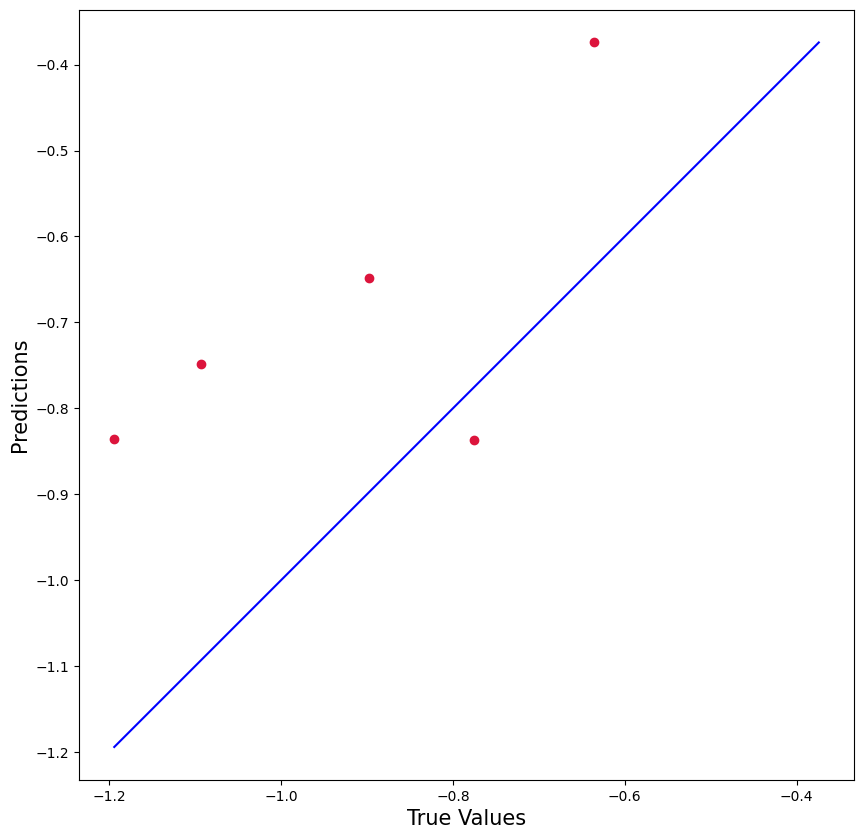

manhattan_distance
Predictions [-0.83753286 -0.37420912 -0.37420912 -0.64873904 -0.83533793]
Actual [-0.77514081 -0.6354183  -1.09316673 -0.89729528 -1.19437084]
**************************************************


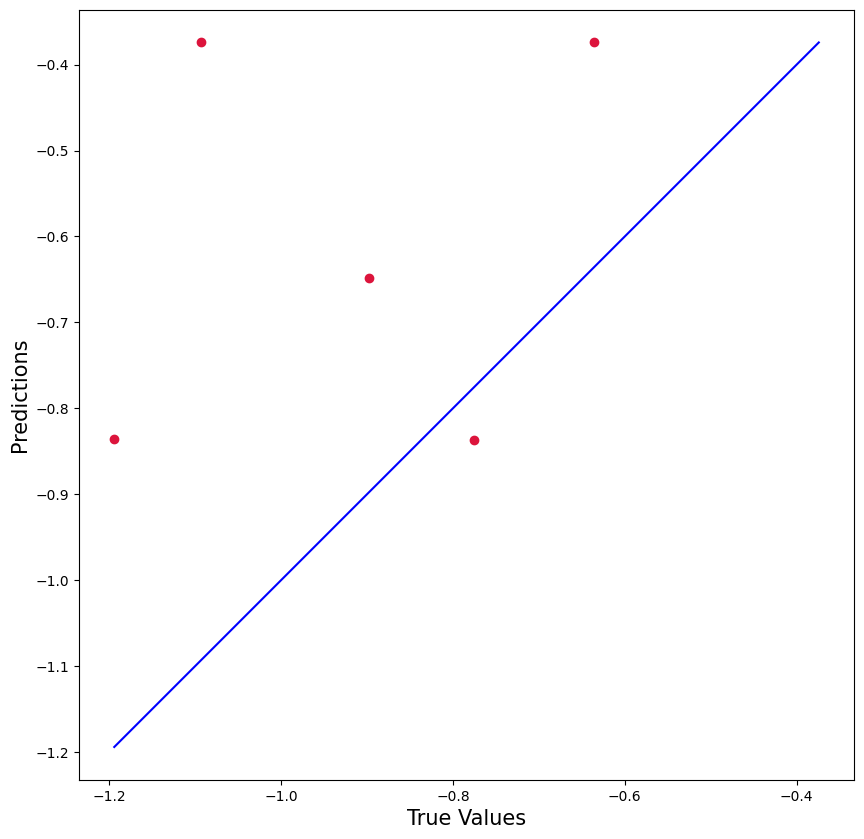

cosine_distance
Predictions [-0.09512363 -0.09512363 -0.42667754 -0.06085944 -0.24349716]
Actual [-0.77514081 -0.6354183  -1.09316673 -0.89729528 -1.19437084]
**************************************************


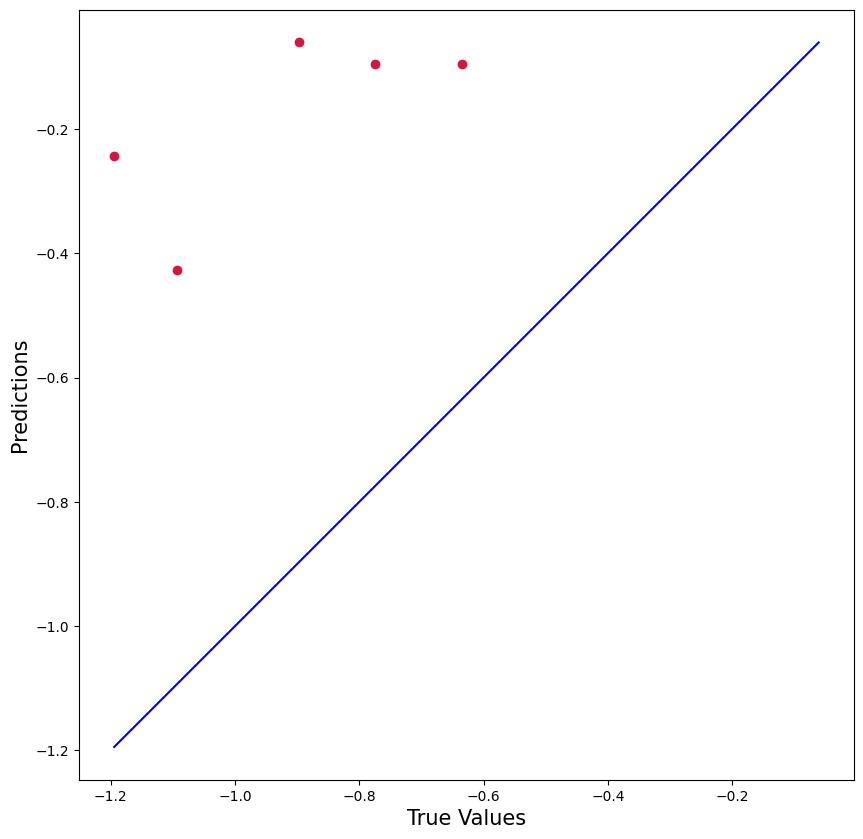

In [55]:
# separate into training and test
X_train = X[5:]
y_train = y[5:]
X_test = X[:5]
y_test = y[:5]

# perform a KNN Regression using multiple distance functions
for f in [euclidean_distance, manhattan_distance, cosine_distance]:
    knn = KNNRegressor(k=3, distance=f)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    print(f.__name__)
    print("Predictions", y_pred)
    print("Actual", y_test)
    print('*' * 50)

    plt.figure(figsize=(10,10))
    plt.scatter(y_test, y_pred, c='crimson')
    
    p1 = max(max(y_pred), max(y_test))
    p2 = min(min(y_pred), min(y_test))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()
